In [7]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

Preprocesing MNIST data

In [8]:
# MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Grab 10% of data
train_size = int(0.1 * len(train_X))
X = train_X[:train_size]
y = train_y[:train_size]

# changing from (6000, 28, 28) to (6000, 28*28)
X = X.reshape(X.shape[0], -1)

# normalization 
X = X / 255.0

Bootstrap method in knn

In [9]:
def bootstrap_knn(X, y, k, n_bootstrap):
    accuracies = []
    
    for i in range(n_bootstrap):
        indices = np.random.choice(len(X), len(X), replace=True)
        X_train, y_train = X[indices], y[indices]

        # Indexes of OOB
        oob_indices = list(set(range(len(X))) - set(indices))
        X_oob, y_oob = X[oob_indices], y[oob_indices]

        if len(X_oob) == 0:
            continue

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predicting on OOB data and calculating accuracy
        y_pred = knn.predict(X_oob)
        accuracy = accuracy_score(y_oob, y_pred)
        accuracies.append(accuracy)

    return np.mean(accuracies)

k_values = range(1, 11)
bootstrap_iterations = [1, 2, 11, 22, 44, 88]
results = {}

for k in k_values:
    results[k] = []
    for n in bootstrap_iterations:
        mean_accuracy = bootstrap_knn(X, y, k, n)
        results[k].append(mean_accuracy)
        #print(f"k={k}, n_bootstrap={n}, mean_accuracy={mean_accuracy}")

results_df = pd.DataFrame(results, index=bootstrap_iterations)

Plots

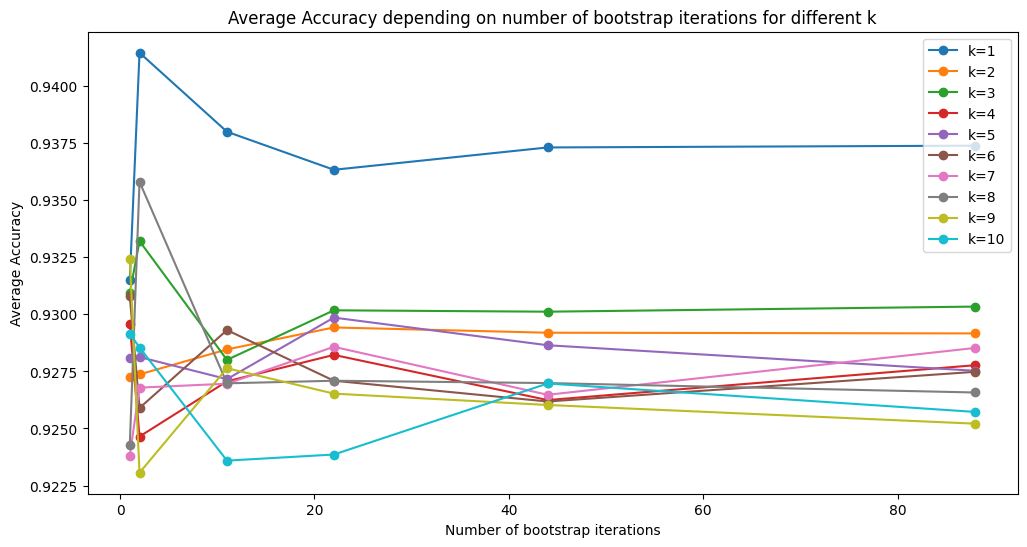

Text(0.5, 1.0, 'Average Accuracy for different k in KNN')

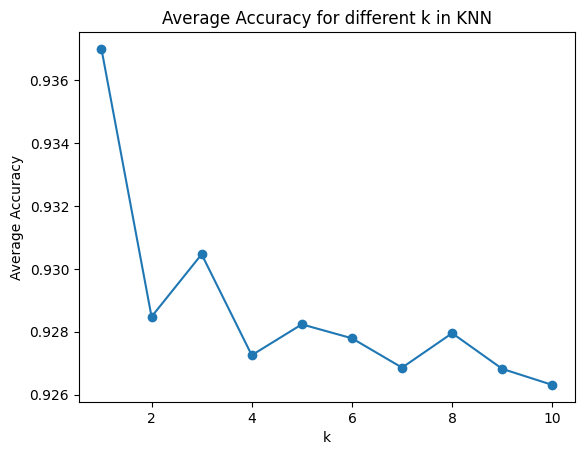

In [10]:
# Wykres dla każdej wartości k
plt.figure(figsize=(12, 6))
for k in k_values:
    plt.plot(bootstrap_iterations, results_df[k], marker='o', label=f'k={k}')
plt.xlabel('Number of bootstrap iterations')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy depending on number of bootstrap iterations for different k')
plt.legend()
plt.show()

acc_k = [np.mean(results[k]) for k in k_values]
plt.figure()
plt.plot(k_values, acc_k, marker='o')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for different k in KNN')